In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
from lab2.AES import encrypt, decrypt
from lab2.ByteGF import BitGF
from lab2.utils import *
from copy import deepcopy
import matplotlib.pyplot as plt

# AES - 128

<img src = "Screenshot from 2020-02-27 19-44-20.png">

In [22]:
inp = np.array([
        BitGF.from_hex('32'),
        BitGF.from_hex('43'),
        BitGF.from_hex('f6'),
        BitGF.from_hex('a8'),
        BitGF.from_hex('88'),
        BitGF.from_hex('5a'),
        BitGF.from_hex('30'),
        BitGF.from_hex('8d'),
        BitGF.from_hex('31'),
        BitGF.from_hex('31'),
        BitGF.from_hex('98'),
        BitGF.from_hex('a2'),
        BitGF.from_hex('e0'),
        BitGF.from_hex('37'),
        BitGF.from_hex('07'),
        BitGF.from_hex('34'),
    ]).reshape((4, 4)).transpose()

key = np.array([
    BitGF.from_hex('2b'),
    BitGF.from_hex('7e'),
    BitGF.from_hex('15'),
    BitGF.from_hex('16'),
    BitGF.from_hex('28'),
    BitGF.from_hex('ae'),
    BitGF.from_hex('d2'),
    BitGF.from_hex('a6'),
    BitGF.from_hex('ab'),
    BitGF.from_hex('f7'),
    BitGF.from_hex('15'),
    BitGF.from_hex('88'),
    BitGF.from_hex('09'),
    BitGF.from_hex('cf'),
    BitGF.from_hex('4f'),
    BitGF.from_hex('3c'),
]).reshape((4, 4)).transpose()

print(inp, '\n\n', key)

[[32 88 31 e0]
 [43 5a 31 37]
 [f6 30 98 07]
 [a8 8d a2 34]] 

 [[2b 28 ab 09]
 [7e ae f7 cf]
 [15 d2 15 4f]
 [16 a6 88 3c]]


<img src = 'Screenshot from 2020-02-27 19-50-04.png'>

In [4]:
enc = encrypt(inp, key)
enc

array([[39, 02, dc, 19],
       [25, dc, 11, 6a],
       [84, 09, 85, 0b],
       [1d, fb, 97, 32]], dtype=object)

In [5]:
decrypted = decrypt(enc, key)
decrypted

array([[32, 88, 31, e0],
       [43, 5a, 31, 37],
       [f6, 30, 98, 07],
       [a8, 8d, a2, 34]], dtype=object)

In [6]:
decrypted == inp

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

# Як зміниться криптотекст якщо в початковому тексті замінити один біт?

In [7]:
changed_inp = deepcopy(inp)
arr = []

In [128]:
enc = encrypt(inp, key)
enc

array([[39, 02, dc, 19],
       [25, dc, 11, 6a],
       [84, 09, 85, 0b],
       [1d, fb, 97, 32]], dtype=object)

In [11]:
changed_bit_enc = encrypt(changed_inp, key)
changed_bit_enc

array([[40, 1b, 8d, 00],
       [60, 77, 67, 1d],
       [6c, b6, 5b, fc],
       [eb, 01, 3b, 6f]], dtype=object)

In [12]:
enc == changed_bit_enc

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

Як видно з останньго виводу криптотексти не  співпадають в жодному байті.

# Потокові режими

## CBC

In [3]:
from lab2.stream_mods import cbc_encrypt, cbc_decrypt

In [18]:
text = "Test"

test_key = next(text2byte_generator("TEST KEY FOR ME."))
print(byte2text(next(text2byte_generator(text))))
encoded = np.array([*text2byte_generator(text), ])
byte2text(test_key)

54657374


'54202020454b464d53454f455459522e'

In [15]:
enc = np.array([*cbc_encrypt(iter(encoded), test_key), ])
print(byte2text(enc))

7074b84caa95209391a7c39c3eca305d
70aa913e7495a7cab820c3304c939c5d6b53963f88274744e9eeb4bd31c327d9


In [9]:
decr = np.array([*cbc_decrypt(iter(enc), test_key), ])
print(byte2text(decr))

54657374206d657373616765


In [34]:
print(decr == encoded)

[[[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]

 [[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]

 [[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]]


## CTR

In [6]:
from lab2.stream_mods import ctr_encrypt, ctr_decrypt

In [17]:
text = "Test message for testing CTR stream mod."

test_key = next(text2byte_generator("TEST KEY FOR CTR"))
print(byte2text(next(text2byte_generator(text))))
encoded = np.array([*text2byte_generator(text), ])
byte2text(test_key)

54207320656d61667365676f74736572


'54202020454b464353454f5454595252'

In [8]:
enc = np.array([*ctr_encrypt(iter(encoded), test_key), ])
byte2text(enc)

'f4d5cbe413ff8c03d19549bb57da78b780c4dde347fb871782b77a8c57cf63b7c5d1d5b05efd8d5ea2f42ede77bc17c5'

In [6]:
fdecr = np.array([*ctr_decrypt(iter(enc), test_key), ])
print(byte2text(decr))

Test message for testing CTR stream mod.


In [18]:
print(decr == encoded)

[[[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]

 [[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]

 [[ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]
  [ True  True  True  True]]]


### TEST

In [26]:
from Crypto.Cipher import AES
pkey = b'\x2b\x7e\x15\x16\x28\xae\xd2\xa6\xab\xf7\x15\x88\x09\xcf\x4f\x3c'
encryptor = AES.new(pkey, AES.MODE_ECB)
message = b"\x32\x43\xf6\xa8\x88\x5a\x30\x8d\x31\x31\x98\xa2\xe0\x37\x07\x34"
encryptor.encrypt(message).hex()

'3925841d02dc09fbdc118597196a0b32'

In [24]:
enc = encrypt(inp, key)

In [21]:
enc

array([[39, 02, dc, 19],
       [25, dc, 11, 6a],
       [84, 09, 85, 0b],
       [1d, fb, 97, 32]], dtype=object)

In [102]:
def change_random_bit(st):
    state = deepcopy(st)
    state[np.random.randint(4)][np.random.randint(4)].bits[np.random.randint(8)] =\
    not state[np.random.randint(4)][np.random.randint(4)].bits[np.random.randint(8)]
    return state

def dist(state1, state2):
    res = 0
    for row1, row2 in zip(state1, state2):
        for cell1, cell2 in zip(row1, row2):
            res += cell1.compare(cell2)
    return res        

st = change_random_bit(inp)
print(inp,'\n',st)

[[32 88 31 e0]
 [43 5a 31 37]
 [f6 30 98 07]
 [a8 8d a2 34]] 
 [[32 88 31 60]
 [43 5a 31 37]
 [f6 30 98 07]
 [a8 8d a2 34]]


In [127]:
base = encrypt(inp, key, 7)
dists = []
for i in range(20):
    st = change_random_bit(inp)
    ct = encrypt(st, key, 7)
    d = dist(base, ct)
    if d!=0:
        dists.append(d)
        
np.mean(dists)

63.0

(array([1., 0., 0., 0., 0., 4., 2., 1., 0., 1.]),
 array([53. , 54.7, 56.4, 58.1, 59.8, 61.5, 63.2, 64.9, 66.6, 68.3, 70. ]),
 <a list of 10 Patch objects>)

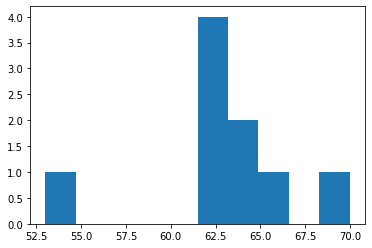

In [128]:
plt.hist(dists)

In [129]:
max(dists)

70

In [130]:
np.mean(dists)

63.0

In [131]:
min(dists)

53